In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('../data/tiktok.csv')
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
393,f6998227-f297-4c94-a3b4-c05c79ae3d98,F5X,https://play-lh.googleusercontent.com/a/ACg8oc...,Hallo saya sangat kecewa sama tiktok karena sa...,1,133,25.7.3,2022-08-18 08:50:31,NaN,NaN,25.7.3
394,9c4b27b6-941e-4d45-97ff-9232132d6663,ozho jabra,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi ini sangat penting untuk menghibur da...,5,10,NaN,2020-09-06 13:06:58,NaN,NaN,NaN
395,6f8c4dd1-714c-4210-ba0b-37b70ee02ed8,Sisan Ismail,https://play-lh.googleusercontent.com/a/ACg8oc...,"aplikasi ini sangat bagus dan menghibur, tapi ...",5,5,NaN,2020-07-12 22:41:40,NaN,NaN,NaN
396,adc9f7f6-3586-4fa4-9e4c-01681b9c55f0,Neli Wulansari,https://play-lh.googleusercontent.com/a/ACg8oc...,Banyak ilmu yang didapat dan untuk pengalaman ...,5,81,23.7.3,2022-03-24 20:28:18,NaN,NaN,23.7.3
397,c2d0f674-8227-46a0-b9fc-f520d7734ae1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Filter ada yang tidak bisa dipakai walaupun su...,4,58,15.5.5,2020-04-04 22:33:42,NaN,NaN,15.5.5


## 1. Cleaning Data

In [3]:
df = df[['userName', 'content', 'score']]

In [4]:
df.shape

(398, 3)

In [5]:
df = df.drop_duplicates(subset=['content'])

In [6]:
df = df.dropna()

In [7]:
df.shape

(398, 3)

In [8]:
# Metode 1: Menggunakan drop
df['content'] = df['content'].astype(str).str.lower()  # Mengubah teks menjadi lowercase
df['content'] = df['content'].replace('false', pd.NA)  # Mengganti 'false' dengan pd.NA (Not Available)
df = df.dropna(subset=['content'])

# Metode 2: Menggunakan boolean indexing
df['content'] = df['content'].astype(str).str.lower()  # Mengubah teks menjadi lowercase
df = df[df['content'] != 'false']

In [9]:
def clean_tiktok_data(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['content'] = df['content'].apply(clean_tiktok_data)

In [10]:
df['content'] = df['content'].str.lower()

In [11]:
df.head()

,userName,content,score
0,Amin Santoso,tiktok sangat bagus bisa berkarya dan mendapat...,5
1,monica hsu,saya suka dengan aplikasi tiktok dan aktif men...,5
2,Oppo A16,maaf saya kasih 2 karena aplikasi nya kurang b...,2
3,Verdi Ximenes,tiktok nya sangat bagus tapi pas di buka video...,3
4,Nenk shinta,kenapa dengan tiktok saya pas buka muter muter...,2


## 2. Preprocessing 

In [12]:
# Definisi fungsi filter_tokens_by_length
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    # Tokenisasi kata
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    # Membuat filter untuk jumlah kata
    mask = (words_count >= min_words) & (words_count <= max_words)
    # Mengaplikasikan filter ke DataFrame
    filtered_df = dataframe[mask]
    return filtered_df

# Menggunakan filter_tokens_by_length untuk mendapatkan baris dengan jumlah kata antara 3 dan 50
min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [14]:
score = df['score']

In [15]:
# Normalisasi
norm = {' gk ':' tidak', ' profisional ' : ' profesional', ' skrng ' : ' sekarang ', ' uwang ':' uang ' ,'tiktokan ':'tiktok', ' yg ':' yang ', ' udh ':' udah ', 'wkwk ':' ', ' min ':' kak ', ' malem ':' malam', ' malem2 ':' malam ', ' sm ':' sama ', ' dy ':' dia ', ' lg ':' lagi ', ' skrg ':' sekarang ', ' ddpn ':' didepan ', ' makasi ':' makasih ', ' pertamaz ':' pertamax ', ' jg ':' juga ', ' donk ':' dong ', ' ikutann ':' ikutan ', ' banyakk ':' banyak ', ' twt ':' tweet', 'mantaap ':'mantap ', ' juarak':' juara ', 'daridulu ':'dari dulu ', 'siapp ':'siap ', ' gamau ':' tidak mau ', ' sll ':' selalu ', ' qu ':' aku ', ' krn ':' karena ', ' irii':' iri', ' muluu ':' terus ', 'mada ':'masa ', 'jgn ':'jangan ', ' jgn ':' jangan ', ' muluuu ':' terus ', 'ntar ':'nanti ', ' awtnya':' awetnya', 'gg ':'keren ', ' kerennn':' keren ', ' bisaa ':' bisa ', 'gaaa':'tidak ', " yg ": " yang ", ' nyampe':' sampai', ' nyampe ':' sampai ', ' lu ':' kamu ', ' ikhlaaasss ':' ikhlas ', ' gak ':' tidak ', ' klo ':' kalo ', ' amp ': ' sampai ', ' ga ':' tidak ', ' yaaaa':' ya ', 'betolll ':'betul ', ' kaga ':' tidak ', ' idk ':' tidak tahu ', ' jkt ':' jakarta ', ' lo ':' kamu ', ' bjir ':' ', ' kek ':' seperti ', ' yg ':' yang ', ' utk ':' untuk ', 'kismin ':'miskin ', ' kismin ':' miskin ', ' pd ':' pada ', ' dgn ':' dengan ', ' ituu ':' itu ', ' jg ':' juga ', 'yoi':'iya ', ' yoi ':' iya ', 'org2 ':'orang ', ' tak ':' tidak ', ' kyk ':' seperti ', ' sbg ':' sebagai ', ' anjjjj ':' ', ' bgt ':' banget ', 'km ':'kamu ', ' km ':' kamu', ' byk ':' banyak ', ' lg ':' lagi ', ' mrk ':' mereka ', ' blm ':' belum '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [16]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))

In [17]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [tiktok, sangat, bagus, berkarya, mendapat, te...
2      [maaf, kasih, 2, aplikasi, nya, kurang, bagus,...
3      [tiktok, nya, sangat, bagus, pas, buka, video,...
4      [dengan, tiktok, pas, buka, muter, muter, pada...
5      [makin, update, malah, oploadnya, selalu, gaga...
                             ...                        
393    [hallo, sangat, kecewa, sama, tiktok, saya, pu...
394    [aplikasi, sangat, penting, menghibur, menarik...
395    [aplikasi, sangat, bagus, menghibur, sayang, h...
396    [banyak, ilmu, didapat, untuk, pengalaman, dis...
397    [filter, yang, bisa, dipakai, walaupun, di, up...
Name: content, Length: 381, dtype: object

In [18]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tiktok sangat bagus karya dapat teman banyak bagai daerah jika untung hasil cuan moga tiktok tambah fitur bagai fasilitas sukses and maju tiktok
maaf kasih 2 aplikasi nya kurang bagus padahal jaring full klw udah buka sekali bisa buka lqi
tiktok nya sangat bagus pas buka video nya nonton tidak kapai jadi di baik yakkk tiktok paling the best
dengan tiktok pas buka muter muter padahal wifi penuh gambar nya muter hitam ada gambar nya di baik dong
makin update malah oploadnya selalu gagal mulu slalu hapus terus tambah buruk aja nih aplikasi
terima kasih tik tok untuk tik tok ini masuk dalam peringkat social populer mudah cari mengupdatenya terima kasih
aku suka sama nih tiktok aku serba gagal buat bikin video aku aplod nga like
poko bagus kalau lebih bagus seperti efect kurang lain
kalau mau bikin video lewat templat kadang kadang engga mau simpan video kadang dan kadang engga
aplikasi bagus banget kenapa aku tambah lagu tik tok favorit muncul sana pliss pulih kan
telah baharu wilayah tida

In [21]:
tokenized.head()

0    tiktok sangat bagus karya dapat teman banyak b...
2    maaf kasih 2 aplikasi nya kurang bagus padahal...
3    tiktok nya sangat bagus pas buka video nya non...
4    dengan tiktok pas buka muter muter padahal wif...
5    makin update malah oploadnya selalu gagal mulu...
Name: content, dtype: object

In [22]:
score.head()

0    5
2    2
3    3
4    2
5    1
Name: score, dtype: int64

In [23]:
# Menggabungkan kedua DataFrame berdasarkan index
score.drop(columns=["Unnamed: 0"], inplace=True)
df = pd.concat([tokenized, score], axis=1)

In [24]:
df.head()

,content,score
0,tiktok sangat bagus karya dapat teman banyak b...,5
2,maaf kasih 2 aplikasi nya kurang bagus padahal...,2
3,tiktok nya sangat bagus pas buka video nya non...,3
4,dengan tiktok pas buka muter muter padahal wif...,2
5,makin update malah oploadnya selalu gagal mulu...,1


## 3. Labeling

In [26]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    # elif score == 3:
    #     return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

In [27]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

sentimen
positif    238
negatif    143
Name: count, dtype: int64

## 4. Visualization

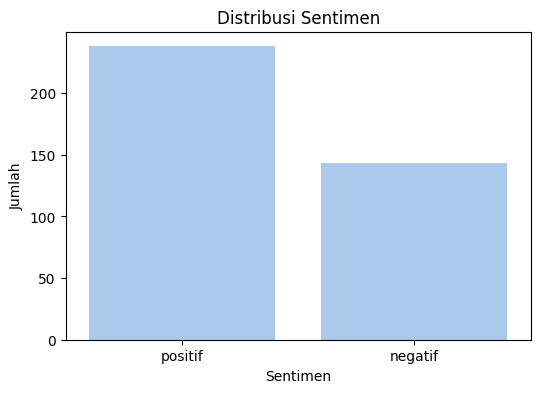

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [29]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']

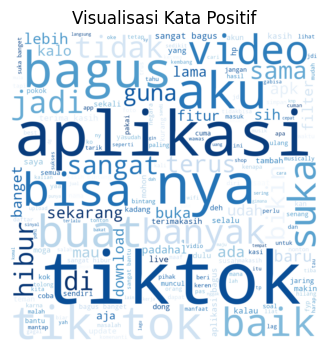

In [30]:
all_text_s1 = ' '.join(word for word in data_positif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

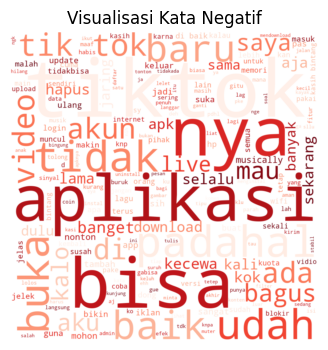

In [31]:
all_text_s0 = ' '.join(word for word in data_negatif["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

## 5. Spliting Data

In [32]:
X=df.content
y=df.sentimen

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 304
Banyak data x_test  : 77
Banyak data y_train : 304
Banyak data y_test  : 77


## 6. Training Data

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [36]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf1 = SVC(kernel="linear") 
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [37]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [38]:
model1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [39]:
hasil1=model1.predict(x_test)

In [40]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.55      0.73      0.63        22
     positif       0.88      0.76      0.82        55

    accuracy                           0.75        77
   macro avg       0.71      0.75      0.72        77
weighted avg       0.78      0.75      0.76        77



In [41]:
model2.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [42]:
hasil2=model2.predict(x_test)

In [43]:
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.62      0.23      0.33        22
     positif       0.75      0.95      0.84        55

    accuracy                           0.74        77
   macro avg       0.69      0.59      0.59        77
weighted avg       0.72      0.74      0.69        77



In [44]:
model3.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [45]:
hasil3=model3.predict(x_test)

In [46]:
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.78      0.64      0.70        22
     positif       0.86      0.93      0.89        55

    accuracy                           0.84        77
   macro avg       0.82      0.78      0.80        77
weighted avg       0.84      0.84      0.84        77



In [47]:
hasilDecisionTreeClassifier = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 = f1_score(y_test, hasil2, average='weighted')

hasilRandomForestClassifier = accuracy_score(hasil3, y_test)
precision3 = precision_score(y_test, hasil3, average='weighted')
recall3 = recall_score(y_test, hasil3, average='weighted')
f1_3 = f1_score(y_test, hasil3, average='weighted')

In [48]:
model = {'Model':['Decision Tree Classifier',
                  'Multinomial Naive Bayes',
                  'Random Forest Classifier',
                 ],
         'AccuracyScore':[hasilDecisionTreeClassifier, hasilMultinomialNB, hasilRandomForestClassifier],
         'Precision':[precision1, precision2, precision3],
         'Recall':[recall1, recall2, recall3],
         'F1-Score':[f1_1, f1_2, f1_3]
         }
model_df = pd.DataFrame(model)
model_df

,Model,AccuracyScore,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.753247,0.782635,0.753247,0.761796
1,Multinomial Naive Bayes,0.740260,0.716874,0.740260,0.694316
2,Random Forest Classifier,0.844156,0.839656,0.844156,0.839098


## 7. Testing

In [49]:
def classify_text(input_text):
    models = [
        ('DecisionTreeClassifier', model_decisionTree),
        ('MultinomialNB', model_multinomialNaiveBayes),
        ('RandomForestClassifier', model_randomForest)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

In [50]:
model_decisionTree = model1.fit(x_train, y_train)
model_multinomialNaiveBayes = model2.fit(x_train, y_train)
model_randomForest = model3.fit(x_train, y_train)

In [51]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan:  jelek


Input kata : jelek

Hasil Klasifikasi:
DecisionTreeClassifier: negatif
MultinomialNB: negatif
RandomForestClassifier: positif
